# <center>Team 5 - Final Project</center>
## <center>DATA 620 - Web Analytics - Summer 2018</center>
## <center>Final Project</center>
### Christopher Estevez, Meaghan Burke, Rickidon Singh,  Ritesh Lohiya, Rose Koh

In [80]:
!python --version
#https://stackoverflow.com/questions/34168019/how-to-use-3to2

Python 3.6.2 :: Anaconda, Inc.


##  Authorizing an application to access Twitter account data

In [1]:
from tw_cred import * # import your own credential
import tweepy

consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

## Get Data

In [2]:
import sys
import jsonpickle
import os

searchQuery = '@jimmyfallon' #'#someHashtag'  # this is what we're searching for
maxTweets = 10000# Some arbitrary large number
tweetsPerQry = 100 # this is the max the API permits
fName = './data/tweets.txt' # We'll store the tweets in a text file.


# If results from a specific ID onwards are reqd, set since_id to that ID.
# else default to no lower limit, go as far back as API allows
sinceId = None

# If results only below a specific ID are, set max_id to that ID.
# else default to no upper limit, start from the most recent tweet matching the search query.
max_id=-1
tweetCount = 0
print("Downloading max {0} tweets".format(maxTweets))
with open(fName, 'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.user_timeline(screen_name = searchQuery, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False,
                                count=tweetsPerQry)
                else:
                    new_tweets = api.user_timeline(screen_name = searchQuery, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False,
                                count=tweetsPerQry,
                                max_id=str(max_id - 1),
                                since_id=sinceId)
            else:
                if (not sinceId):
                    new_tweets = api.user_timeline(screen_name = searchQuery, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False, 
                                count=tweetsPerQry,
                                max_id=str(max_id - 1))
                else:
                    new_tweets = api.user_timeline(screen_name = searchQuery, # user_id=tweeters,
                                include_rts=True,
                                exclude_replies =False, count=tweetsPerQry,
                                            max_id=str(max_id - 1),
                                            since_id=sinceId)
            if not new_tweets:
                print("No more tweets found")
                break
            for tweet in new_tweets:
                f.write(jsonpickle.encode(tweet._json, unpicklable=False) +
                        '\n')
            tweetCount += len(new_tweets)
            print("Downloaded {0} tweets".format(tweetCount))
            max_id = new_tweets[-1].id
        except tweepy.TweepError as e:
            # Just exit if any error
            print("some error : " + str(e))
            break

print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))

Downloaded 100 tweets
Downloaded 200 tweets
Downloaded 300 tweets
Downloaded 400 tweets
Downloaded 500 tweets
Downloaded 600 tweets
Downloaded 700 tweets
Downloaded 800 tweets
Downloaded 900 tweets
Downloaded 1000 tweets
Downloaded 1100 tweets
Downloaded 1200 tweets
Downloaded 1300 tweets
Downloaded 1400 tweets
Downloaded 1500 tweets
Downloaded 1600 tweets
Downloaded 1700 tweets
Downloaded 1799 tweets
Downloaded 1899 tweets
Downloaded 1999 tweets
Downloaded 2099 tweets
Downloaded 2199 tweets
Downloaded 2299 tweets
Downloaded 2399 tweets
Downloaded 2499 tweets
Downloaded 2599 tweets
Downloaded 2699 tweets
Downloaded 2799 tweets
Downloaded 2899 tweets
Downloaded 2999 tweets
Downloaded 3099 tweets
Downloaded 3199 tweets
Downloaded 3215 tweets
No more tweets found
Downloaded 3215 tweets, Saved to ./data/tweets.txt


In [3]:
import json
import pandas as pd

In [4]:
tweets_data_path = './data/tweets.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [5]:
print(len(tweets_data))

3215


In [81]:
tweets_data[2]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Jul 08 15:07:28 +0000 2018',
 'entities': {'hashtags': [{'indices': [75, 98],
    'text': 'TonightShowSummerReads'}],
  'symbols': [],
  'urls': [{'display_url': 'soundcloud.com/tonightshowsum…',
    'expanded_url': 'https://soundcloud.com/tonightshowsummerreads/chapters3-5',
    'indices': [51, 74],
    'url': 'https://t.co/HBIGe1A2iz'}],
  'user_mentions': []},
 'favorite_count': 1055,
 'favorited': False,
 'geo': None,
 'id': 1015975660890796032,
 'id_str': '1015975660890796032',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 129,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'text': 'Chapters 3-5 recap of "Children of Blood and Bone" https:/

In [7]:
tweets = pd.DataFrame() #create pandas dataframe
tweets['TimeStamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['Name'] = list(map(lambda tweet: tweet["user"]["screen_name"], tweets_data))
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweets['Favorites'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
tweets['Retweet'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweets['in_reply_to_status_id_str'] = list(map(lambda tweet: tweet['in_reply_to_status_id_str'], tweets_data))
tweets['in_reply_to_screen_name'] = list(map(lambda tweet: tweet['in_reply_to_screen_name'], tweets_data))

In [8]:
tweets.head(1)

,TimeStamp,Name,text,lang,tweet_id,Favorites,Retweet,in_reply_to_status_id_str,in_reply_to_screen_name
0,Mon Jul 16 13:07:43 +0000 2018,jimmyfallon,Back with new shows!! Tonight: @iamjamiefoxx &...,en,1018844628785692672,921,88,None,None


## Data Preprocessing

In [9]:
%%time

pd.options.mode.chained_assignment = None

#extract the username through the tweets (preceded by @ or by RT @)
tweets['tweetos'] = '' 

#add tweetos first part
for i in range(len(tweets['text'])):
    try:
        tweets['tweetos'][i] = tweets['text'].str.split(' ')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets['text'])):
    if tweets['tweetos'].str.contains('@')[i]  == False:
        tweets['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(tweets['text'])):
    tweets['text'][i] = " ".join([word for word in tweets['text'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])

CPU times: user 30.1 s, sys: 169 ms, total: 30.3 s
Wall time: 30.9 s


In [10]:
tweets['text'][0]

'Back with new shows!! Tonight: &amp; are here, stops by, and stand-up from #FallonTonight'

In [11]:
#delete certains punctuations, put the text in lower case and delete the double space with the function apply
import re
tweets['text'] = tweets['text'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
tweets['text'] = tweets['text'].apply(lambda x: re.sub('  ', ' ', x))
tweets['text'][0]

'back with new shows tonight amp are here stops by and stand-up from fallontonight'

## Frequency

In [12]:
# copy the text column
tweets["text_original"] = tweets["text"]

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 30000, ngram_range = (1,4),
                             stop_words =['the',
'of','to','it','in','that','an','of the','this','his','about','at','or','than','from',
'in the','are','so','rrb','the film','who','lrb','to the','doe','do','for the','been',
'ani','on the','co','https', 'http', 'https co', 'and', 'on', 'is', 'amp', 'for', 'here', 'by',
'your', 'be', 'my', 'is here', 'and music'])

In [14]:
vectorizer.fit(tweets["text"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=30000, min_df=1,
        ngram_range=(1, 4), preprocessor=None,
        stop_words=['the', 'of', 'to', 'it', 'in', 'that', 'an', 'of the', 'this', 'his', 'about', 'at', 'or', 'than', 'from', 'in the', 'are', 'so', 'rrb', 'the film', 'who', 'lrb', 'to the', 'doe', 'do', 'for the', 'been', 'ani', 'on the', 'co', 'https', 'http', 'https co', 'and', 'on', 'is', 'amp', 'for', 'here', 'by', 'your', 'be', 'my', 'is here', 'and music'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
tweets_vect = vectorizer.transform(tweets["text"])
columns = vectorizer.get_feature_names()
tweets_vector = pd.DataFrame(tweets_vect.toarray(), columns= columns)
print(tweets_vector.shape)

(3215, 30000)


In [16]:
import time

In [17]:
%%time
dictionary = {}

# This takes a while
# This will take each train dataset's word and count the frequency in dictionary form.
for column in tweets_vector.columns:
    dictionary[column] = tweets_vector[column].sum()

dictionary_df = pd.DataFrame.from_dict({'word': list(dictionary.keys()), 'count': list(dictionary.values())})
dictionary_df = dictionary_df.sort_values('count', ascending=False)
dictionary_df = dictionary_df[0:100]

#save it as .csv
dictionary_df.to_csv("./data/countvect_frequency.csv")

CPU times: user 7.5 s, sys: 327 ms, total: 7.83 s
Wall time: 7.92 s


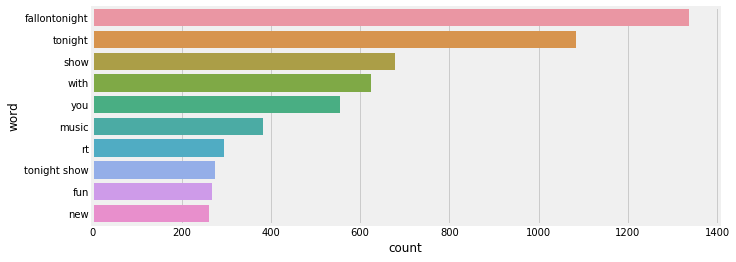

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')
%matplotlib inline

figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10, 4)

sns.barplot(data=dictionary_df[:10], y="word", x="count", ax=ax)

---

## Sentiment Analysis

In [19]:
import numpy as np
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
sentiment_analyzer = SentimentIntensityAnalyzer()

In [21]:
def tweet_scale(score):
    if score <= -.6:
        return "most_negative"
    if score <= -.2:
        return "negative"
    if score <= .2:
        return "neutral"
    if score <= .6:
        return "positive"
    if score <= .8:
        return "more_positive"
    if score <= 1:
        return "most_positive"

In [22]:
def polarity_tweets(tweets):
    sentiment = []
    score = []
    for tweet in tweets:
        ss = sentiment_analyzer.polarity_scores(str(tweet))
        sentiment.append(tweet_scale(ss['compound']))
        score.append(ss['compound'])
    
    return sentiment, score

sentiment, score = polarity_tweets(tweets_data)    

tweets['Sentiment'] = sentiment
tweets['Score'] = score

In [23]:
tweets.head(1)

,TimeStamp,Name,text,lang,tweet_id,Favorites,Retweet,in_reply_to_status_id_str,in_reply_to_screen_name,tweetos,text_original,Sentiment,Score
0,Mon Jul 16 13:07:43 +0000 2018,jimmyfallon,back with new shows tonight amp are here stops...,en,1018844628785692672,921,88,None,None,other,back with new shows tonight amp are here stops...,most_positive,0.826


In [24]:
#Sentiment Count of Tweets 
tweets.groupby(['Sentiment'])['Score'].count().reset_index().sort_values(['Score'], ascending = False)

,Sentiment,Score
2,most_positive,2508
1,most_negative,317
0,more_positive,255
3,negative,65
5,positive,58
4,neutral,12


In [25]:
#Sentiment By Mean "Favorites"
tweets.groupby(['Sentiment'])['Favorites'].mean().reset_index().sort_values(['Favorites'], ascending = False)

,Sentiment,Favorites
2,most_positive,2958.934211
0,more_positive,2687.552941
1,most_negative,2670.520505
5,positive,2398.655172
3,negative,2268.861538
4,neutral,1470.333333


In [26]:
#Sentiment By Mean "Retweets"
tweets.groupby(['Sentiment'])['Retweet'].mean().reset_index().sort_values(['Retweet'], ascending = False)

,Sentiment,Retweet
2,most_positive,948.016348
0,more_positive,871.992157
5,positive,503.275862
1,most_negative,396.845426
3,negative,290.830769
4,neutral,142.250000


In [27]:
#most positive/ most negative tweets
sentiment = tweets.sort_values(['Score'], ascending = False).reset_index()
most_positive = sentiment .iloc[0]
most_negative = sentiment .iloc[(len(sentiment)-1)]

In [28]:
most_positive

index                                                                     2318
TimeStamp                                       Fri Nov 27 00:57:38 +0000 2015
Name                                                               jimmyfallon
text                         thanks thanks thanks thanks thanks thanks than...
lang                                                                        en
tweet_id                                                    670043770113495041
Favorites                                                                18754
Retweet                                                                   7849
in_reply_to_status_id_str                                                 None
in_reply_to_screen_name                                                   None
tweetos                                                                  other
text_original                thanks thanks thanks thanks thanks thanks than...
Sentiment                                           

In [29]:
most_negative

index                                                   185
TimeStamp                    Fri May 04 03:29:53 +0000 2018
Name                                            jimmyfallon
text                                      rt i’m so ashamed
lang                                                     en
tweet_id                                 992244897439666176
Favorites                                                 0
Retweet                                                 778
in_reply_to_status_id_str                              None
in_reply_to_screen_name                                None
tweetos                                               other
text_original                             rt i’m so ashamed
Sentiment                                     most_negative
Score                                               -0.9769
Name: 3214, dtype: object

---

## Wordcloud Visualization

In [30]:
#from IPython.display import display
from wordcloud import WordCloud, STOPWORDS

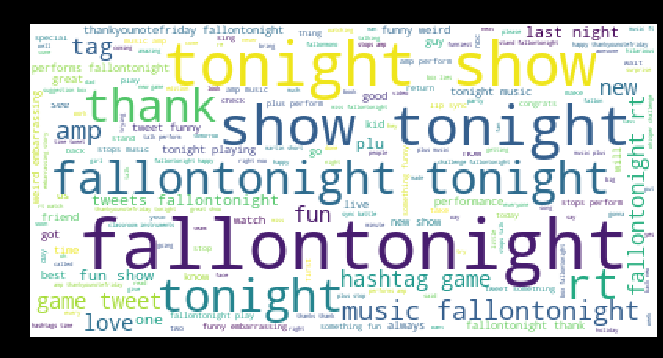

In [62]:
def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(10,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Wordcloud")

    
wordcloud(tweets,'text')  

## Sentiment visualization

In [ ]:
## Meaghan's sentiment analysis

In [40]:
sentiment_df = tweets.pivot_table(values='Score', index=tweets.index, columns='Sentiment', aggfunc='first')
sentiment_df = sentiment_df.fillna(0)

Sentiment,more_positive,most_negative,most_positive,negative,neutral,positive
0,0.0,0.0000,0.8260,0.0,0.0,0.0
1,0.0,0.0000,0.8802,0.0,0.0,0.0
2,0.0,0.0000,0.8126,0.0,0.0,0.0
3,0.0,-0.6884,0.0000,0.0,0.0,0.0
4,0.0,-0.8736,0.0000,0.0,0.0,0.0


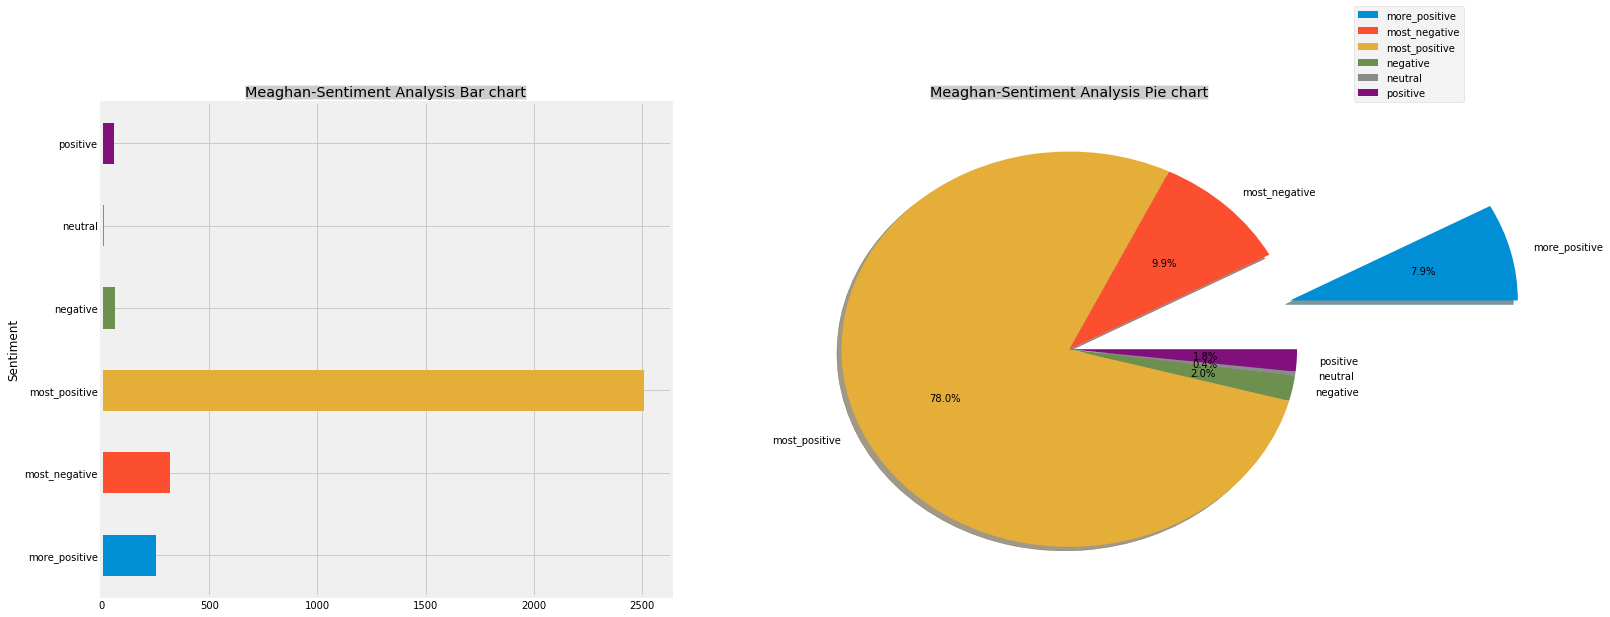

In [52]:
sentiment_summary = tweets.groupby(["Sentiment"])["Sentiment"].count()
sentiment_summary.rename("",inplace=True)
explode = (1, 0, 0, 0,0,0)
plt.subplot(221)
sentiment_summary.transpose().plot(kind='barh',figsize=(20, 20))
plt.title('Meaghan-Sentiment Analysis Bar chart', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
sentiment_summary.plot(kind='pie',figsize=(20, 20),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Meaghan-Sentiment Analysis Pie chart', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

In [ ]:
## Rose's sentiment analysis

In [33]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in tweets['text']] 
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text'].str.upper())


In [35]:
tweets['sentiment_compound_polarity']=tweets.text_lem.apply(lambda x:sentiment_analyzer.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text_lem.apply(lambda x:sentiment_analyzer.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text_lem.apply(lambda x:sentiment_analyzer.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text_lem.apply(lambda x:sentiment_analyzer.polarity_scores(x)['pos'])
tweets['sentiment_type']=''

tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'

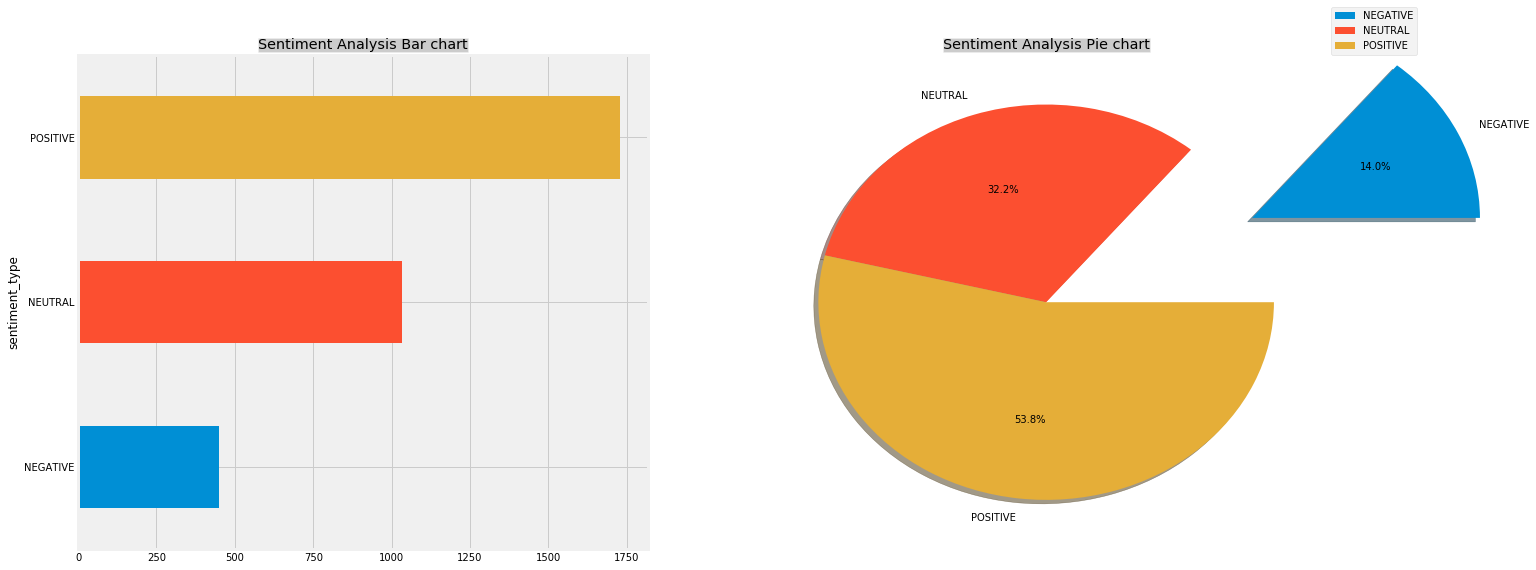

In [37]:
#Visualize sentiments
tweets_sentiment = tweets.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentiment.rename("",inplace=True)
explode = (1, 0, 0)
plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(20, 20))
plt.title('Sentiment Analysis Bar chart', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
tweets_sentiment.plot(kind='pie',figsize=(20, 20),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis Pie chart', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

In [ ]:
## To compare...

In [36]:
tweets[["text_original", "Sentiment", "sentiment_type"]].head(5)
#tweets['text'][3208]

,text_original,Sentiment,sentiment_type
0,back with new shows tonight amp are here stops...,most_positive,NEGATIVE
1,and share photos of where you are reading and ...,most_positive,POSITIVE
2,"chapters 3-5 recap of ""children of blood and b...",most_positive,NEUTRAL
3,gonna put out a sound cloud soon to check in g...,most_negative,POSITIVE
4,oh i’m in deep now but i’ll be checking in tom...,most_negative,NEUTRAL


## Network Analysis

We explorer relationship between twitter accounts. A weight value should be total number of followers for the first twitter account. 

---

# Sources

http://adilmoujahid.com/posts/2014/07/twitter-analytics/


https://www.karambelkar.info/2015/01/how-to-use-twitters-search-rest-api-most-effectively./

https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html
